In [1]:
import sklearn.linear_model
import pandas
import numpy
import numpy.random
import seaborn
import vtreat
import vtreat.util
import vtreat.transform

In [2]:
class PolyTransform(vtreat.transform.UserTransform):
    """a polynomial model"""
    def __init__(self, *, deg=5, alpha=0.1):
        vtreat.transform.UserTransform.__init__(self, treatment='poly')
        self.models_ = None
        self.deg = deg
        self.alpha = alpha

    def poly_terms(self, vname, vec):
        vec = numpy.asarray(vec)
        r = pandas.DataFrame({'x': vec})
        for d in range(1, self.deg+1):
            r[vname + '_' + str(d)] = vec**d
        return r
    
    def fit(self, X, y):
        self.models_ = {}
        self.incoming_vars_ = []
        self.derived_vars_ = []
        for v in X.columns:
            if vtreat.util.can_convert_v_to_numeric(X[v]):
                X_v = self.poly_terms(v, X[v])
                model_v = sklearn.linear_model.Ridge(alpha=self.alpha).fit(X_v, y) 
                new_var = v + "_poly"
                self.models_[v] = (model_v, [c for c in X_v.columns], new_var)
                self.incoming_vars_.append(v)
                self.derived_vars_.append(new_var)
        return self
        
    def transform(self, X):
        r = pandas.DataFrame()
        for k, v in self.models_.items():
            model_k = v[0]
            cols_k = v[1]
            new_var = v[2]
            X_k = self.poly_terms(k, X[k])
            xform_k = model_k.predict(X_k)
            r[new_var] = xform_k
        return r


In [3]:
d = pandas.DataFrame({'x':[i for i in range(100)]})
d['y'] = numpy.sin(0.2*d['x']) + 0.2*numpy.random.normal(size=d.shape[0])
d.head()

,x,y
0,0,-0.188057
1,1,-0.104672
2,2,0.469285
3,3,0.272010
4,4,0.603709


In [4]:
step = PolyTransform(deg=10)

In [5]:
fit = step.fit_transform(d[['x']], d['y'])
fit['x'] = d['x']
fit.head()

/Users/johnmount/opt/anaconda3/envs/ai_academy_3_7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.09351e-40): result may not be accurate.
  overwrite_a=True).T


,x_poly,x
0,-0.263258,0
1,-0.043296,1
2,0.218220,2
3,0.478494,3
4,0.707910,4


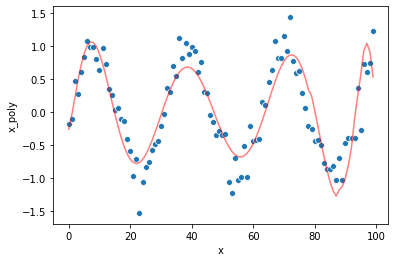

In [6]:
seaborn.scatterplot(x='x', y='y', data=d)
seaborn.lineplot(x='x', y='x_poly', data=fit, color='red', alpha=0.5)

In [7]:
transform = vtreat.NumericOutcomeTreatment(
    outcome_name='y',
    params = vtreat.vtreat_parameters({
        'filter_to_recommended': False,
        'user_transforms': [PolyTransform(deg=10)]
    }))

In [8]:
transform.fit(d, d['y'])

/Users/johnmount/opt/anaconda3/envs/ai_academy_3_7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.78226e-42): result may not be accurate.
  overwrite_a=True).T
/Users/johnmount/opt/anaconda3/envs/ai_academy_3_7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.53976e-42): result may not be accurate.
  overwrite_a=True).T
/Users/johnmount/opt/anaconda3/envs/ai_academy_3_7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.51805e-42): result may not be accurate.
  overwrite_a=True).T
/Users/johnmount/opt/anaconda3/envs/ai_academy_3_7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.04556e-42): result may not be accurate.
  overwrite_a=True).T
/Users/johnmount/opt/anaconda3/envs/ai_academy_3_7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py

vtreat.vtreat_api.NumericOutcomeTreatment(outcome_name='y', cols_to_copy=['y'], )

In [9]:
transform.score_frame_

,variable,orig_variable,treatment,y_aware,has_range,PearsonR,significance,vcount,default_threshold,recommended
0,x,x,clean_copy,False,True,-0.135012,1.804771e-01,1.0,0.5,True
1,x_poly,x,poly,True,True,0.896726,1.816677e-36,1.0,0.5,True


In [10]:
x2_overfit = transform.transform(d)

/Users/johnmount/Documents/work/pyvtreat/pkg/vtreat/vtreat_api.py:107: UserWarning: possibly called transform on same data used to fit
(this causes over-fit, please use fit_transform() instead)
  "possibly called transform on same data used to fit\n" +


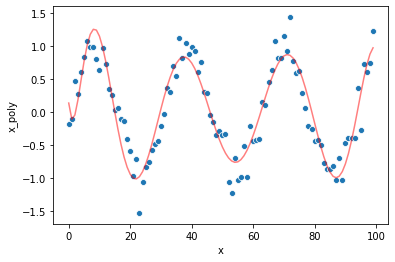

In [11]:
seaborn.scatterplot(x='x', y='y', data=x2_overfit)
seaborn.lineplot(x='x', y='x_poly', data=x2_overfit, color='red', alpha=0.5)

In [12]:
x2 = transform.fit_transform(d, d['y'])

/Users/johnmount/opt/anaconda3/envs/ai_academy_3_7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.78226e-42): result may not be accurate.
  overwrite_a=True).T
/Users/johnmount/opt/anaconda3/envs/ai_academy_3_7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.4025e-42): result may not be accurate.
  overwrite_a=True).T
/Users/johnmount/opt/anaconda3/envs/ai_academy_3_7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.22739e-42): result may not be accurate.
  overwrite_a=True).T
/Users/johnmount/opt/anaconda3/envs/ai_academy_3_7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.92077e-42): result may not be accurate.
  overwrite_a=True).T
/Users/johnmount/opt/anaconda3/envs/ai_academy_3_7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:

In [13]:
transform.score_frame_

,variable,orig_variable,treatment,y_aware,has_range,PearsonR,significance,vcount,default_threshold,recommended
0,x,x,clean_copy,False,True,-0.135012,1.804771e-01,1.0,0.5,True
1,x_poly,x,poly,True,True,0.834335,4.312400e-27,1.0,0.5,True


In [14]:
x2.head()

,y,x,x_poly
0,-0.188057,0.0,2.332155
1,-0.104672,1.0,1.152522
2,0.469285,2.0,-0.175078
3,0.272010,3.0,0.208507
4,0.603709,4.0,0.507284


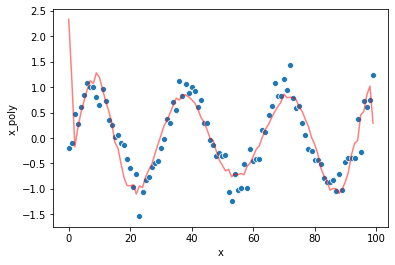

In [15]:
seaborn.scatterplot(x='x', y='y', data=x2)
seaborn.lineplot(x='x', y='x_poly', data=x2, color='red', alpha=0.5)
